In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
from PIL import Image
import os

from tensorflow import keras
from matplotlib import style
style.use('fivethirtyeight')

from keras.utils.vis_utils import plot_model
from skimage import transform
from skimage import exposure
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, recall_score
from livelossplot import PlotLossesKeras
from keras.api._v2.keras.callbacks import History
from sklearn.model_selection import GridSearchCV
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

np.random.seed(42)

data_dir = '/Users/rama96x/Desktop/aiml2023_labs/archive'
train_path = '/Users/rama96x/Desktop/aiml2023_labs/archive/Train'
test_path = '/Users/rama96x/Desktop/aiml2023_labs/archive/Test'

In [25]:
NUM_CATEGORIES = len([f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))])
NUM_CATEGORIES

43

In [26]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

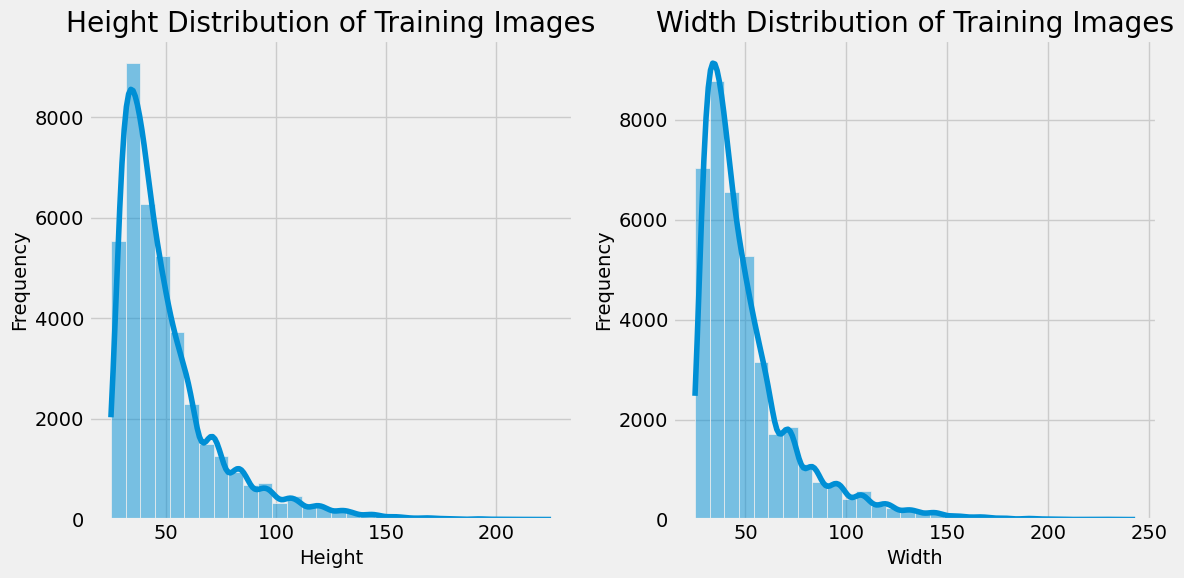

In [27]:
train_csv_path = os.path.join(data_dir, 'Train.csv')

# Read the Train.csv file
train_df = pd.read_csv(train_csv_path)

# Get the paths of the training images
image_paths = train_df['Path'].values

# Initialize lists to store image dimensions
heights = []
widths = []

# Iterate over the image paths and retrieve dimensions
for path in image_paths:
    image_path = os.path.join(data_dir, path)
    image = plt.imread(image_path)
    heights.append(image.shape[0])
    widths.append(image.shape[1])

# Create a combined figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the height distribution
sns.histplot(heights, bins=30, kde=True, ax=ax[0])
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Height Distribution of Training Images')

# Plot the width distribution
sns.histplot(widths, bins=30, kde=True, ax=ax[1])
ax[1].set_xlabel('Width')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Width Distribution of Training Images')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [23]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

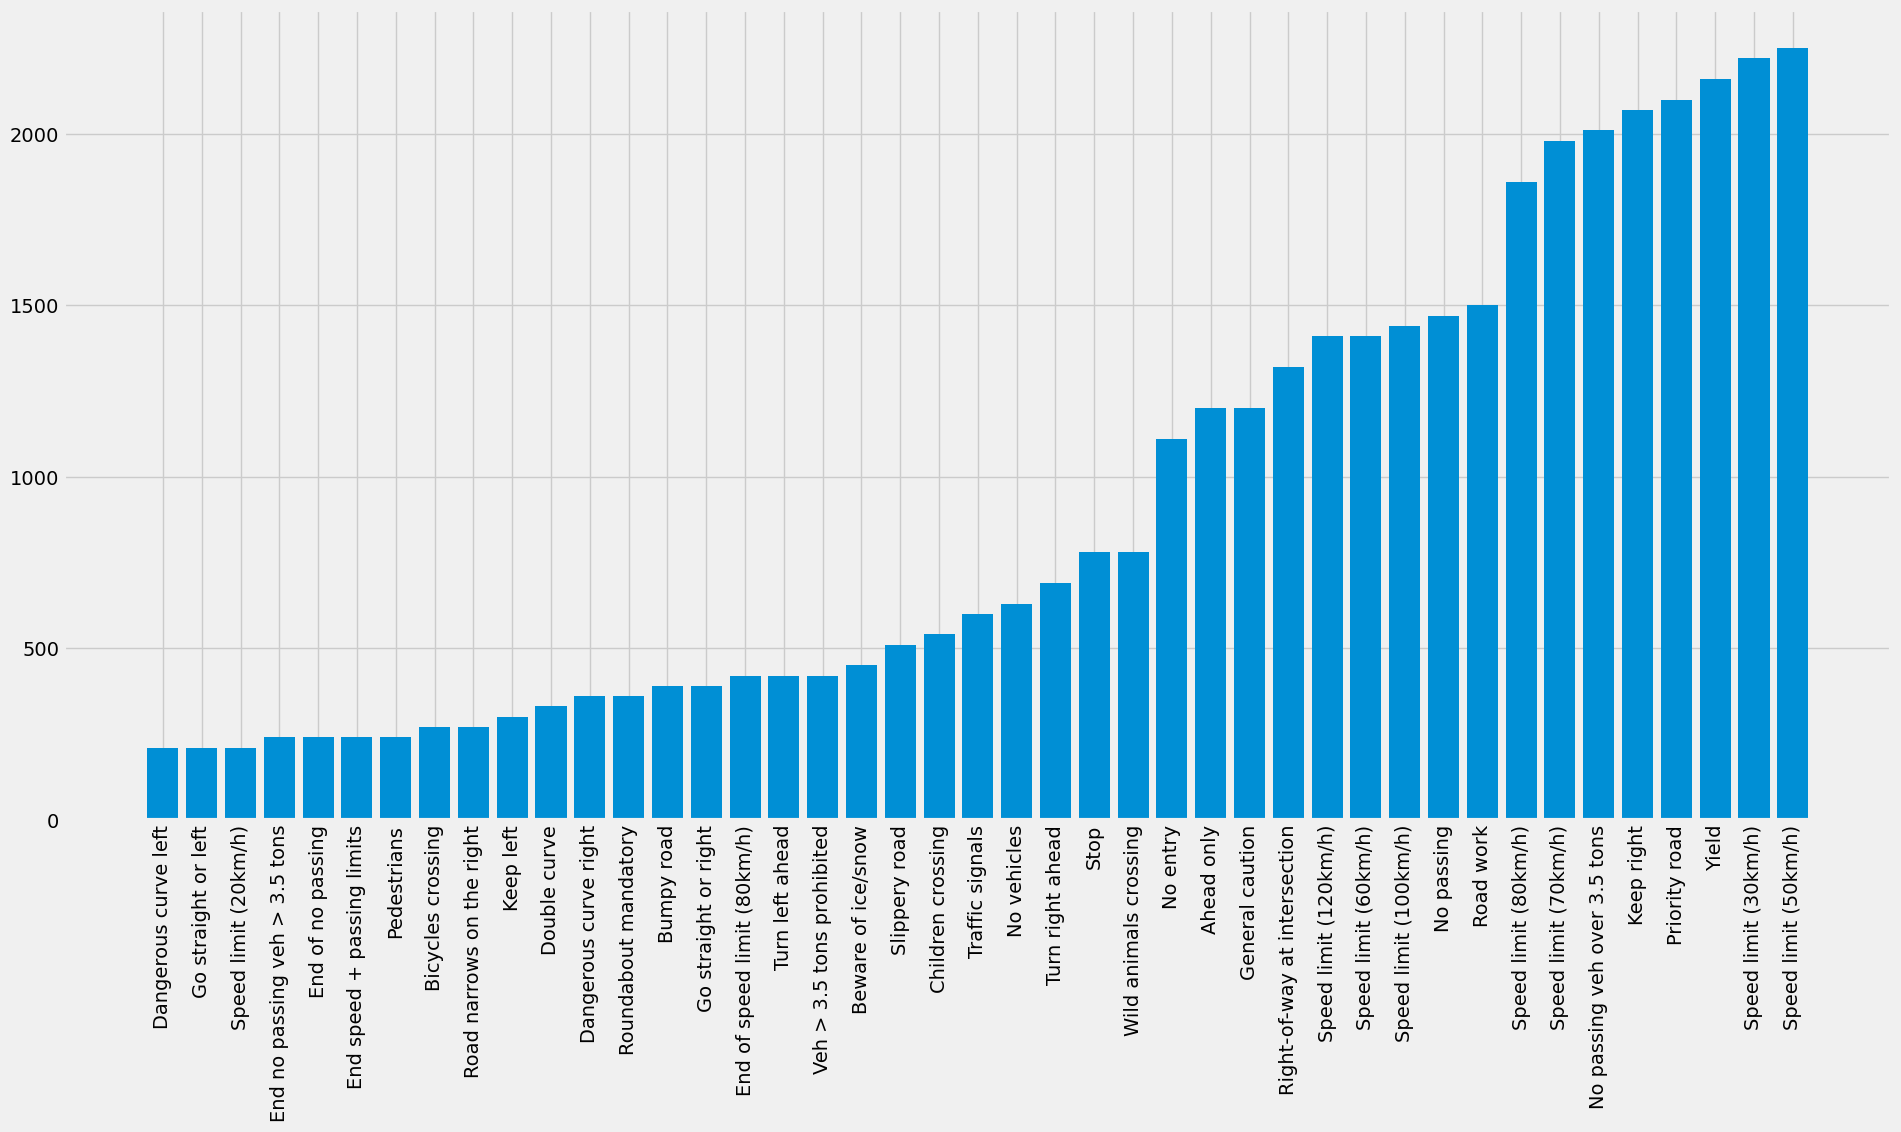

In [4]:
folders = []
for item in os.listdir(train_path):
    if os.path.isdir(os.path.join(train_path, item)):
        folders.append(item)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [4]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

/Users/rama96x/Desktop/aiml2023_labs/archive/Train/0
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/1
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/2
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/3
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/4
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/5
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/6
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/7
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/8
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/9
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/10
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/11
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/12
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/13
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/14
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/15
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/16
/Users/rama96x/Desktop/aiml2023_labs/archive/Train/17
/Users/rama96x/Desktop/aiml2023_labs/a

In [19]:
print(
    f"Train IMGs shape: {image_data.shape}\n",
    f"Test IMGs shape: {image_labels.shape}"
)

Train IMGs shape: (39209, 30, 30, 3)
 Test IMGs shape: (39209,)


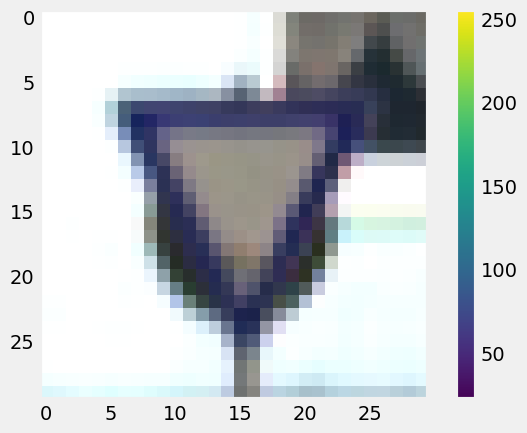

In [22]:
plt.figure()
plt.imshow(random.choice(image_data))
plt.colorbar()
plt.grid(False)

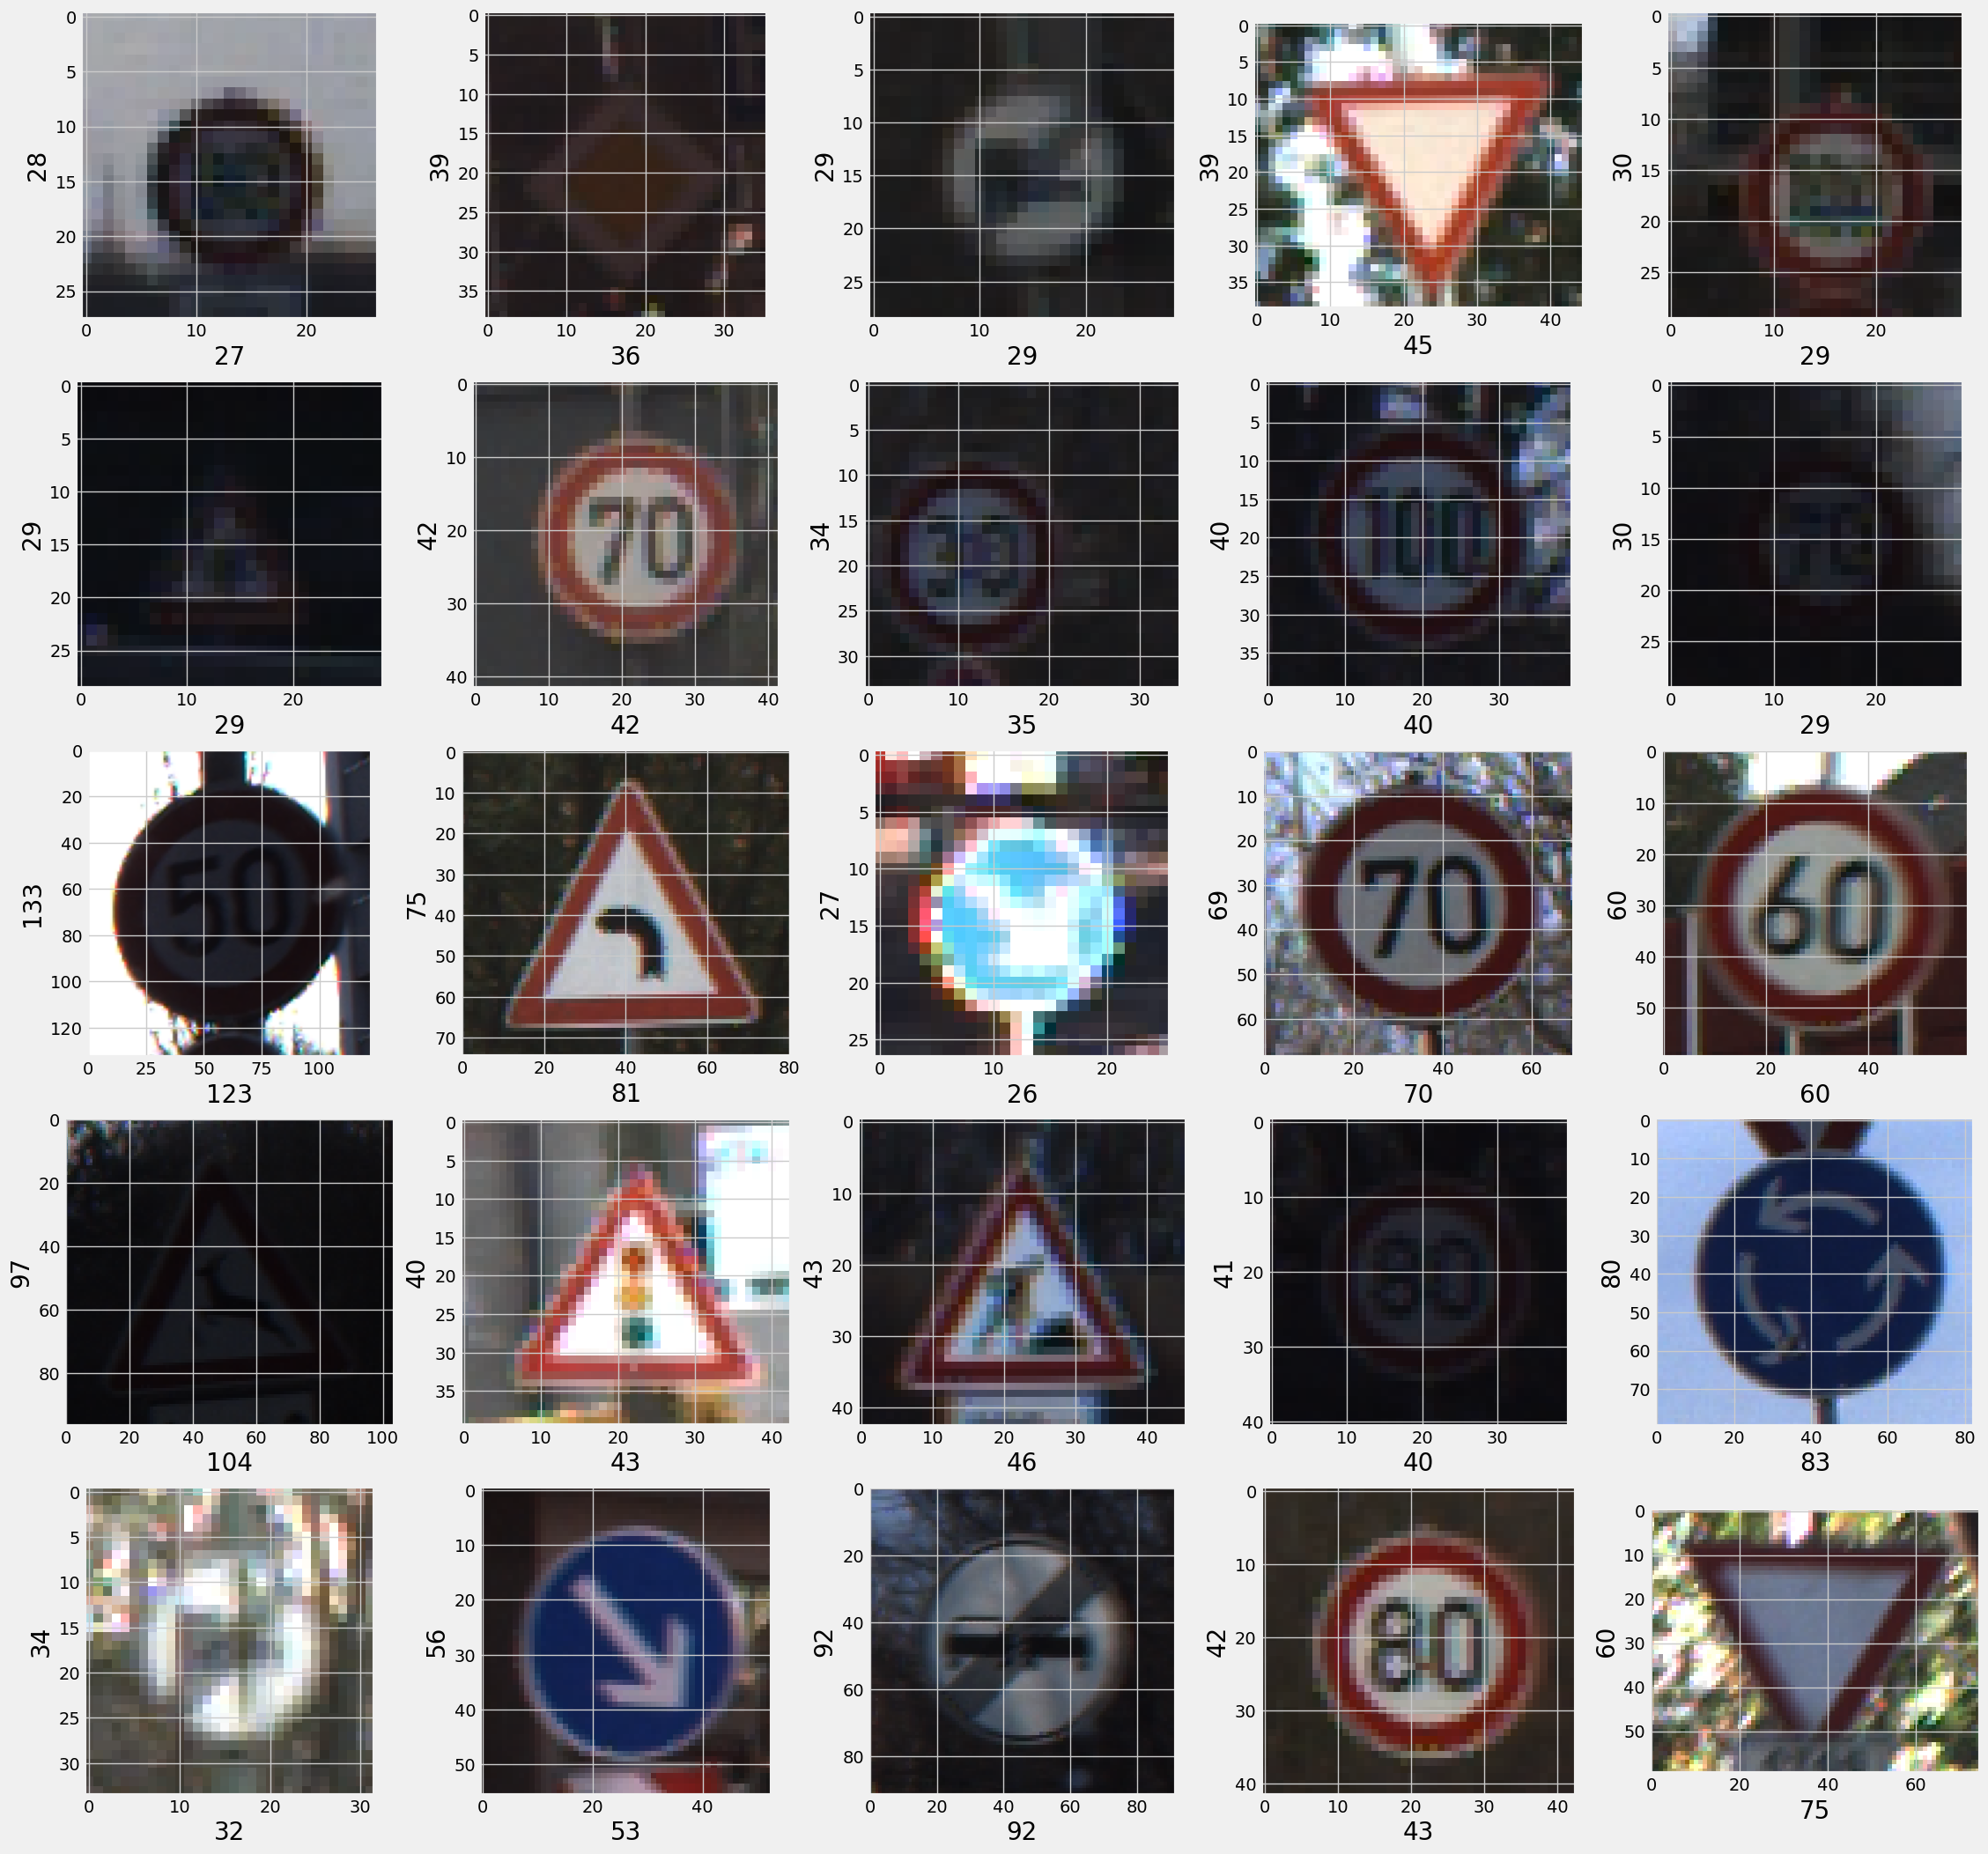

In [5]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [5]:
#Shuffle the data, so we can mitigate bias as much as possible i.e., no pattern
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True,stratify=image_labels)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [17]:
print(f"Train labels: {y_train} ] Length: {len(image_labels)}\n")
print("Value counts:")
pd.Series(image_labels).map(pd.Series(classes)).value_counts()

Train labels: [18  1  8 ...  9  2 12] ] Length: 39209

Value counts:


Speed limit (50km/h)             2250
Speed limit (30km/h)             2220
Yield                            2160
Priority road                    2100
Keep right                       2070
No passing veh over 3.5 tons     2010
Speed limit (70km/h)             1980
Speed limit (80km/h)             1860
Road work                        1500
No passing                       1470
Speed limit (100km/h)            1440
Speed limit (60km/h)             1410
Speed limit (120km/h)            1410
Right-of-way at intersection     1320
Ahead only                       1200
General caution                  1200
No entry                         1110
Stop                              780
Wild animals crossing             780
Turn right ahead                  689
No vehicles                       630
Traffic signals                   600
Children crossing                 540
Slippery road                     510
Beware of ice/snow                450
Turn left ahead                   420
Veh > 3.5 to

In [7]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


## Building the model (no GridSearchCV)

In [8]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

2023-05-10 11:16:28.307908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/Users/rama96x/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 30s 34ms/step - loss: 1.1495 - accuracy: 0.6908 - val_loss: 0.0933 - val_accuracy: 0.9726
Epoch 2/30
858/858 [==============================] - 29s 34ms/step - loss: 0.1993 - accuracy: 0.9387 - val_loss: 0.0833 - val_accuracy: 0.9742
Epoch 3/30
858/858 [==============================] - 36s 41ms/step - loss: 0.1181 - accuracy: 0.9630 - val_loss: 0.0212 - val_accuracy: 0.9931
Epoch 4/30
858/858 [==============================] - 32s 38ms/step - loss: 0.0841 - accuracy: 0.9749 - val_loss: 0.0148 - val_accuracy: 0.9959
Epoch 5/30
858/858 [==============================] - 33s 38ms/step - loss: 0.0706 - accuracy: 0.9786 - val_loss: 0.0171 - val_accuracy: 0.9948
Epoch 6/30
858/858 [==============================] - 33s 39ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0237 - val_accuracy: 0.9926
Epoch 7/30
858/858 [==============================] - 34s 40ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0264 - val_accuracy:

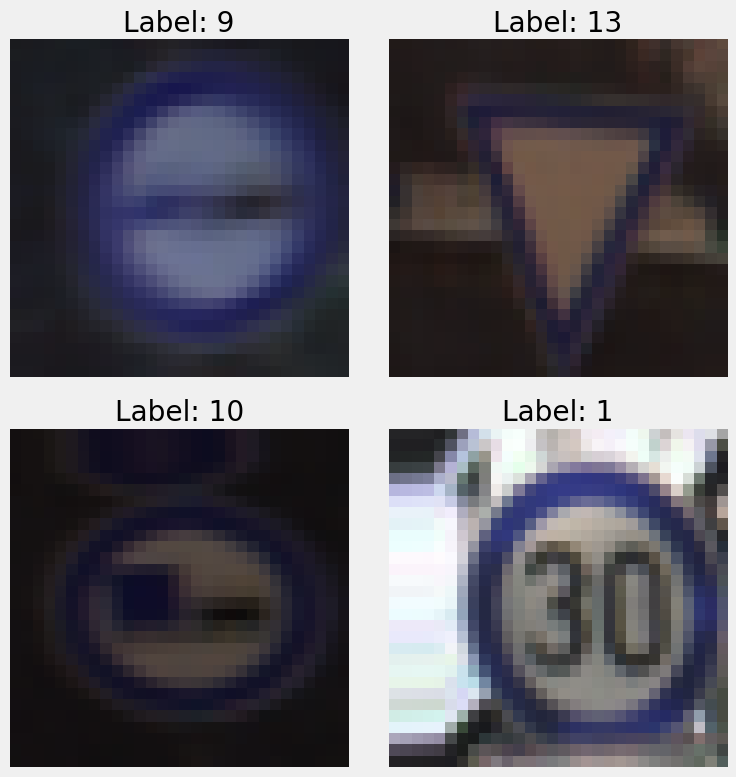

In [28]:
# Generate augmented image iterator
augmented_images = aug.flow(X_train, y_train, batch_size=32)

# Get a batch of augmented images and labels
augmented_images_batch, labels_batch = next(augmented_images)

# Convert labels to class labels
class_labels = np.argmax(labels_batch, axis=1)

# Display the augmented images
num_examples = 4  # Number of images to display
rows = 2  # Number of rows in the grid
cols = 2  # Number of columns in the grid

fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
axes = axes.ravel()

for i in range(num_examples):
    image = augmented_images_batch[i]  # Retrieve the augmented image
    label = class_labels[i]  # Retrieve the corresponding class label

    axes[i].imshow(image)
    axes[i].set_title("Label: {}".format(label))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Building the model (using SciKit-Learn as a wrapper w. GridSearchCV)

In [8]:
#Global variables
lr = 0.001
epochs = 30

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))

In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
#Defining the Keras model as a function
def create_model(optimizer='adam', dropout_rate=0.0):
    model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(axis=-1),

        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(axis=-1),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(rate=dropout_rate),

        keras.layers.Dense(43, activation='softmax')
])
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [10]:
#Wrap the function to create a SciKit-Learn estimator object
model = KerasClassifier(build_fn=create_model, verbose=0)

/var/folders/r3/l1wv0gp54vvdd53lk82711h40000gn/T/ipykernel_96415/2566461152.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [11]:
# define the grid search parameters
param_grid = {
    #'optimizer': ['adam', 'sgd', 'rmsprop'],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    #'batch_size': [32, 64, 128],
    #'epochs': [20, 30, 40]
}

In [12]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

2023-05-09 11:18:03.347235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 11:18:03.347245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 11:18:03.347257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

In [13]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.937513 using {'dropout_rate': 0.3}
0.934744 (0.016640) with: {'dropout_rate': 0.2}
0.937513 (0.022167) with: {'dropout_rate': 0.3}
0.879142 (0.064630) with: {'dropout_rate': 0.4}
0.887234 (0.020912) with: {'dropout_rate': 0.5}


In [14]:
best_params = grid_result.best_params_

### Loading the test data and predicting the score (with GridSearchCV)

In [15]:
from sklearn import metrics 
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = grid_result.predict(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 4s 10ms/step
Test Data accuracy:  95.69279493269993


## Evaluating the model

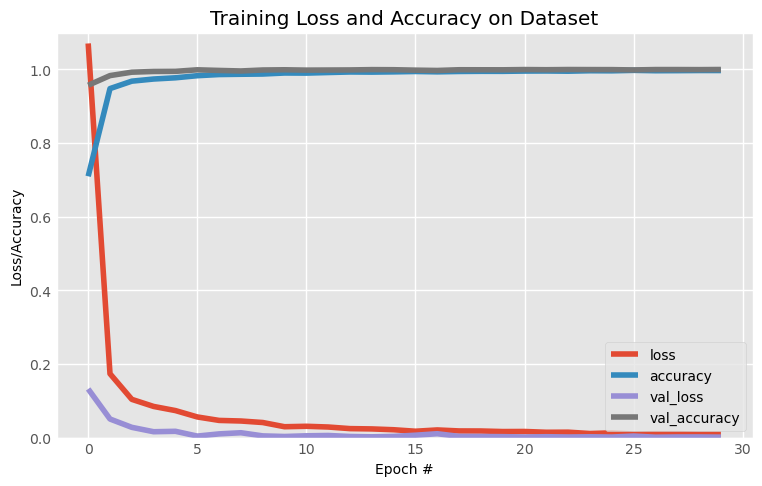

In [98]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()


# Loading the test data and predicting the score (without GridSearchCV)

In [33]:
from sklearn import metrics 
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test).argmax(axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 5s 12ms/step
Test Data accuracy:  98.42438638163104


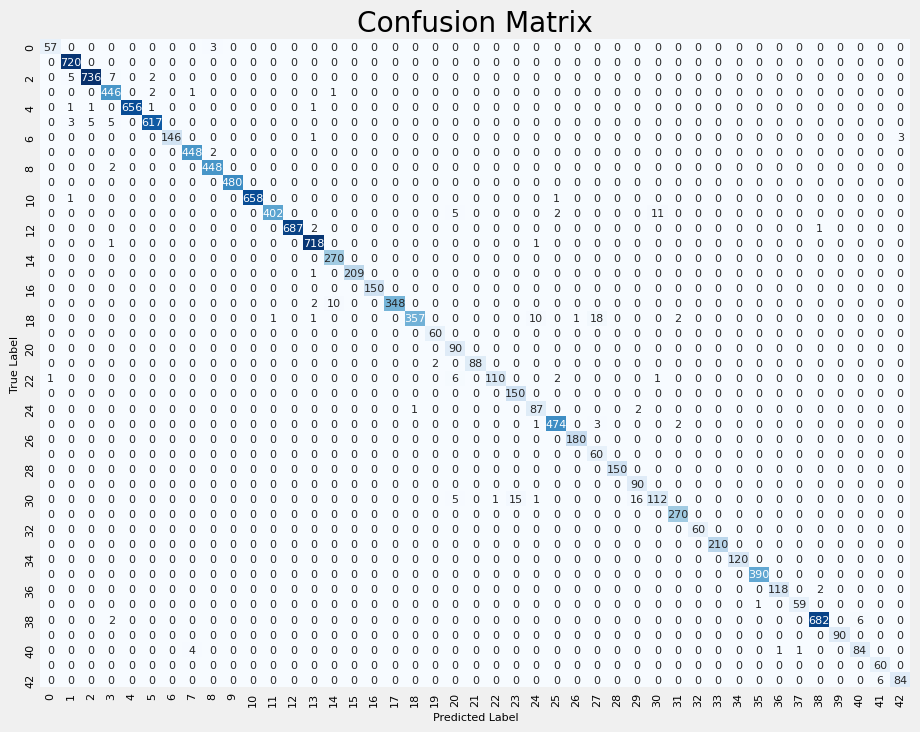

In [40]:
# Create the confusion matrix
cm = confusion_matrix(labels,pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 8})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label',fontsize=8)
plt.ylabel('True Label',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


In [56]:
# Print the true positive values and calculate their sum
true_positives = np.diag(cm)
true_positives_sum = np.sum(true_positives)
total_values = np.sum(cm)
overall_accuracy = np.sum(np.diag(cm)) / np.sum(cm)

print("True Positives:")
for i, true_positive in enumerate(true_positives):
    print("Class {}: {}".format(i, true_positive))

print("Sum of True Positives: ", true_positives_sum, "out of: ", format(total_values),"Overall Accuracy: {:.2%}".format(overall_accuracy))


True Positives:
Class 0: 57
Class 1: 720
Class 2: 736
Class 3: 446
Class 4: 656
Class 5: 617
Class 6: 146
Class 7: 448
Class 8: 448
Class 9: 480
Class 10: 658
Class 11: 402
Class 12: 687
Class 13: 718
Class 14: 270
Class 15: 209
Class 16: 150
Class 17: 348
Class 18: 357
Class 19: 60
Class 20: 90
Class 21: 88
Class 22: 110
Class 23: 150
Class 24: 87
Class 25: 474
Class 26: 180
Class 27: 60
Class 28: 150
Class 29: 90
Class 30: 112
Class 31: 270
Class 32: 60
Class 33: 210
Class 34: 120
Class 35: 390
Class 36: 118
Class 37: 59
Class 38: 682
Class 39: 90
Class 40: 84
Class 41: 60
Class 42: 84
Sum of True Positives:  12431 out of:  12630 Overall Accuracy: 98.42%


In [56]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      1.00       720
           2       0.99      1.00      1.00       750
           3       1.00      0.99      0.99       450
           4       1.00      0.99      0.99       660
           5       0.99      0.99      0.99       630
           6       1.00      0.99      0.99       150
           7       1.00      1.00      1.00       450
           8       0.99      1.00      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.98      0.99      0.99       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       0.99      1.00      0.99       150
          17       0.99    

## A visualized predictions on test data

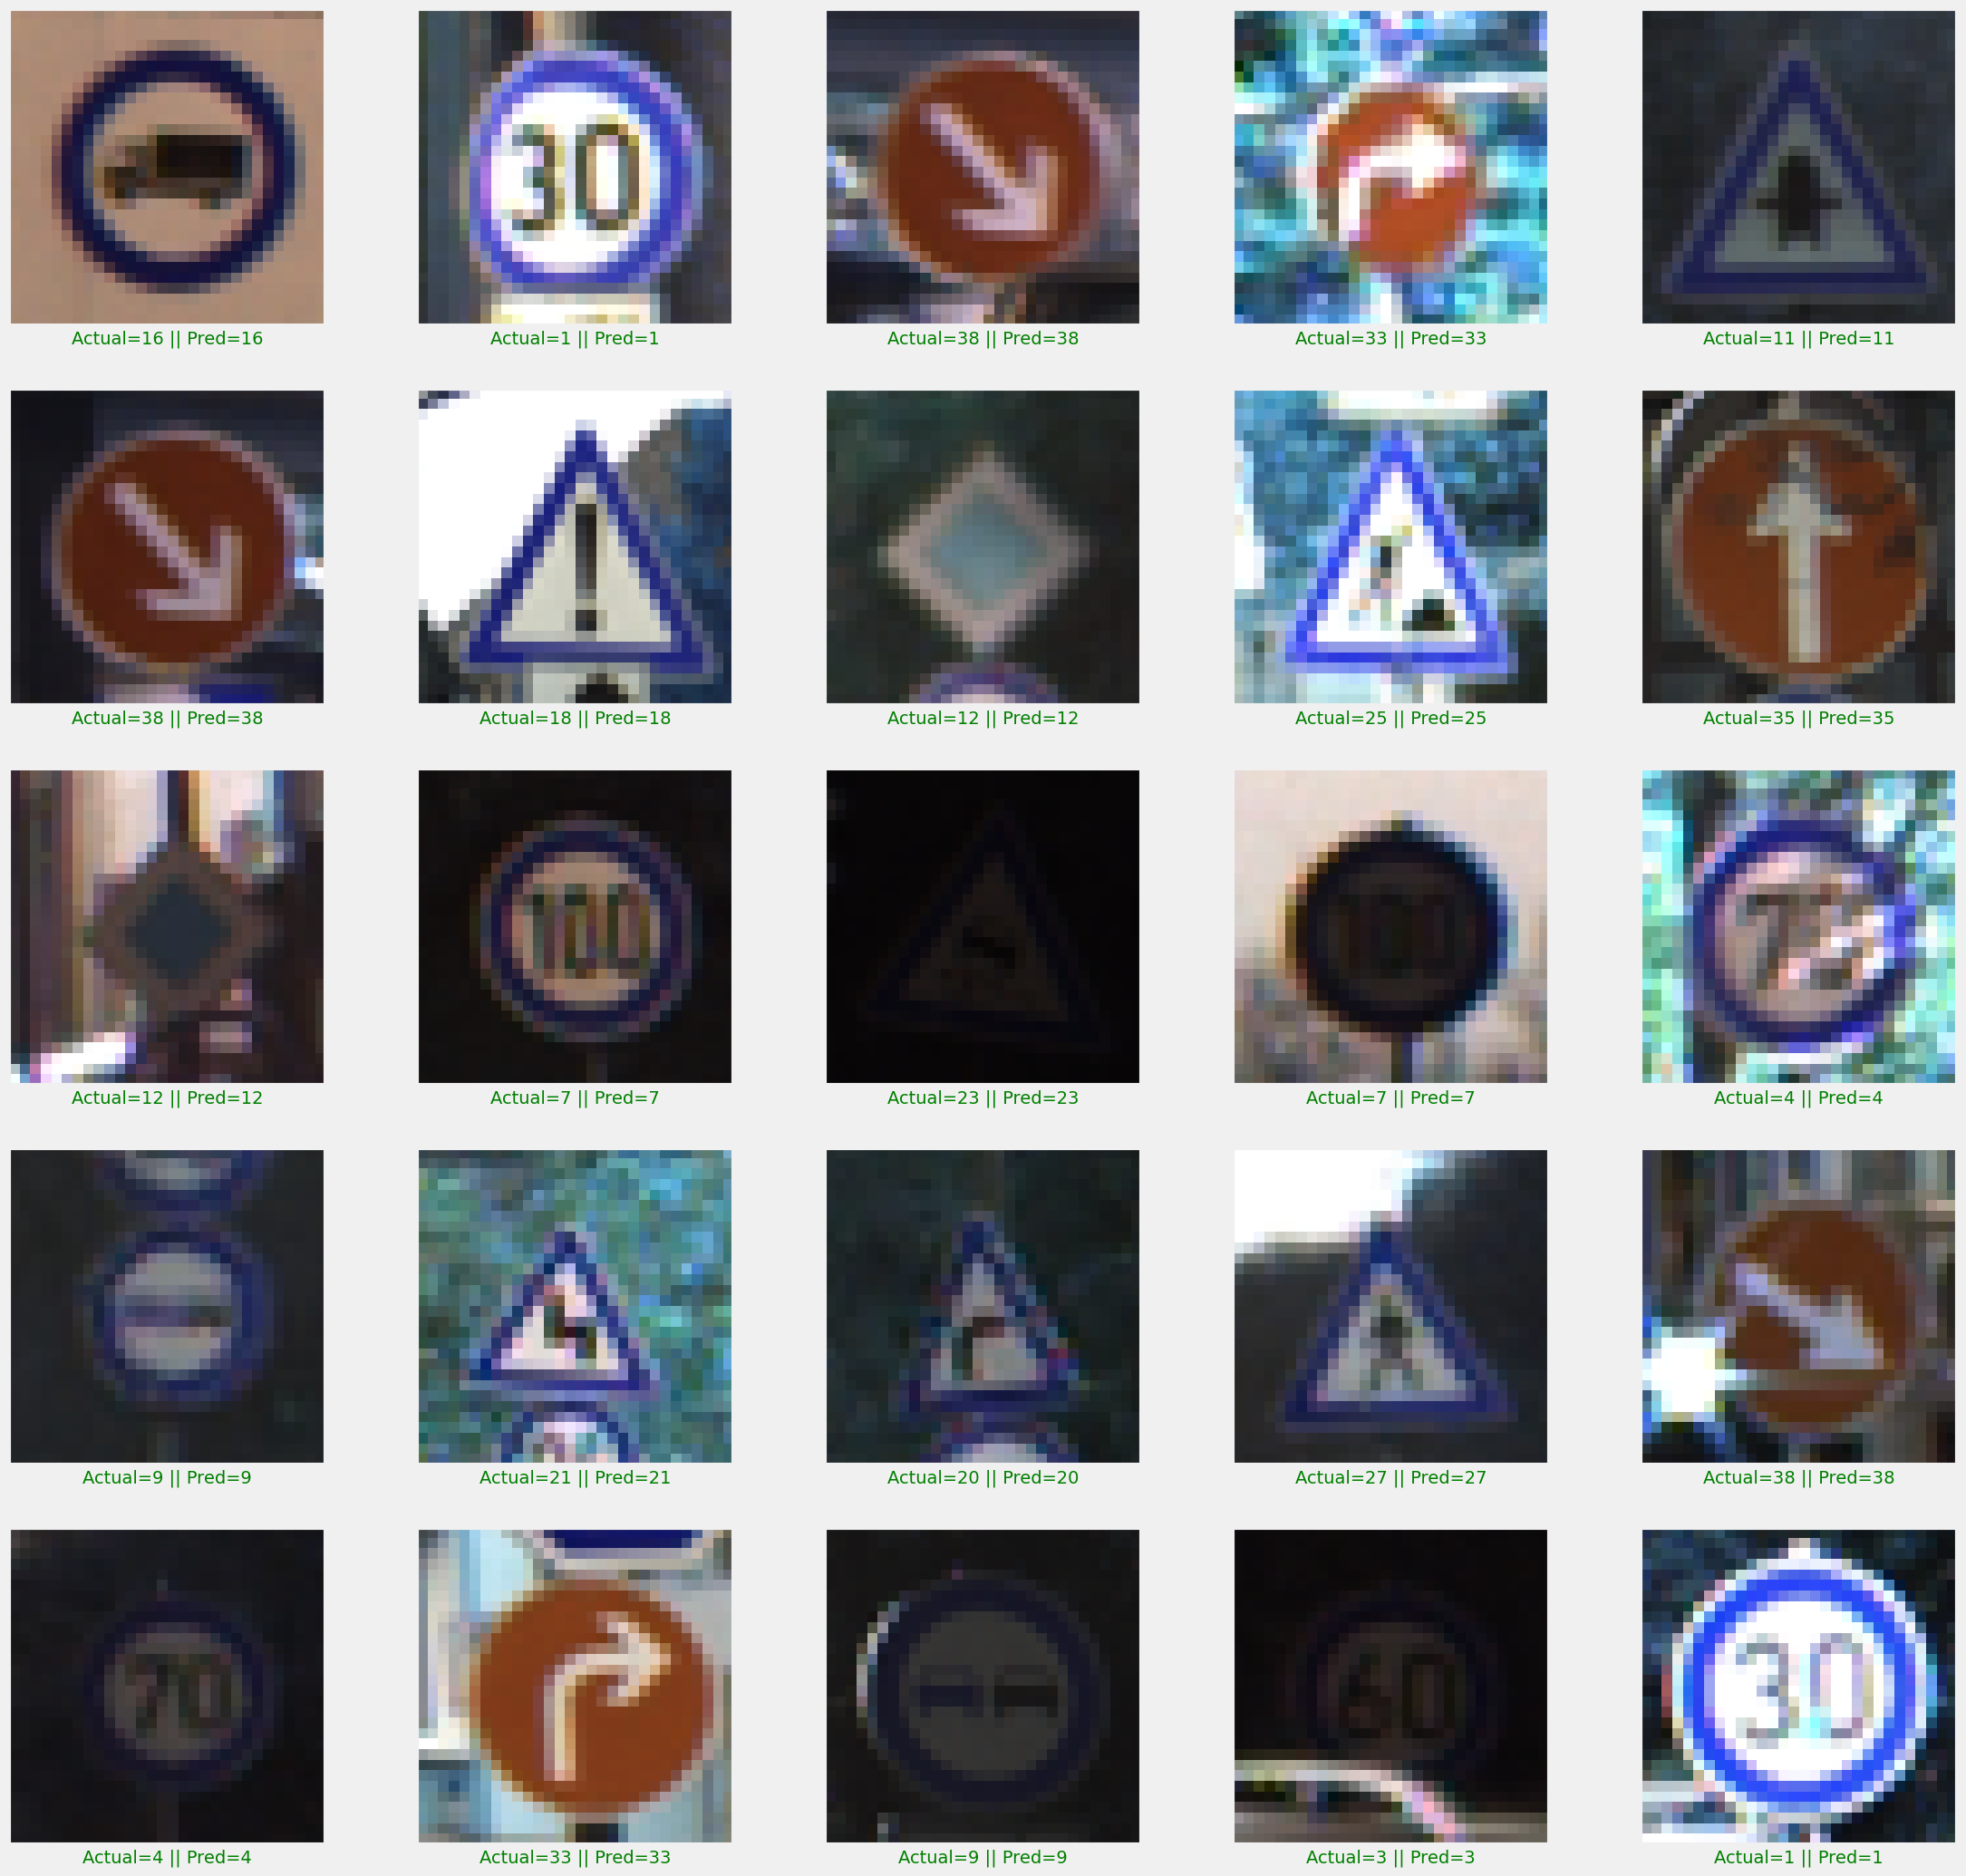

In [125]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()